##### • Build at least 2–3 models 
##### • Train the models 
##### • Compare performance 
##### • Perform hyperparameter tuning

In [2]:
##Credit Card Fraud Detection Using Machine Learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset
df = pd.read_csv(r"C:\Users\ADITYA\Documents\Datasets\creditcard.csv")

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

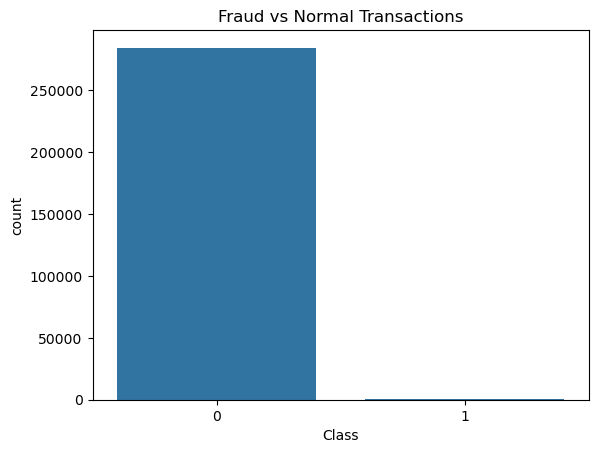

In [10]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
sm = SMOTE(random_state=42)

In [15]:
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

C:\Users\ADITYA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADITYA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ADITYA\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADITYA\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ADITYA\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

In [16]:
y_train_res.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_final = scaler.fit_transform(X_train_res)
X_test_final = scaler.transform(X_test)

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
preprocessing_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [21]:
X_train_final = preprocessing_pipeline.fit_transform(X_train_res)
X_test_final = preprocessing_pipeline.transform(X_test)

#### Train the models 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

In [25]:
model1.fit(X_train_final, y_train_res)
y_pred1 = model1.predict(X_test_final)

In [26]:
from sklearn.metrics import classification_report, roc_auc_score

In [27]:
print("Logistic Regression")
print(classification_report(y_test, y_pred1))
print("ROC AUC:", roc_auc_score(y_test, y_pred1))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.96      0.64     56962
weighted avg       1.00      0.99      0.99     56962

ROC AUC: 0.95510376350878


In [28]:
model2.fit(X_train_final, y_train_res)
y_pred2 = model2.predict(X_test_final)

In [29]:
print("Decision Tree")
print(classification_report(y_test, y_pred2))
print("ROC AUC:", roc_auc_score(y_test, y_pred2))

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.78      0.57        98

    accuracy                           1.00     56962
   macro avg       0.72      0.89      0.78     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.8869285685574173


In [30]:
model3.fit(X_train_final, y_train_res)

RandomForestClassifier()

In [31]:
y_pred3 = model3.predict(X_test_final)

In [32]:
print("Random Forest")
print(classification_report(y_test, y_pred3))
print("ROC AUC:", roc_auc_score(y_test, y_pred3))

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9182530391166033


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [35]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=2,
    scoring='f1',
    n_jobs=-1
)

In [36]:
grid.fit(X_train_final, y_train_res)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [37]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_final)

In [38]:
print("Final Model Performance")
print(classification_report(y_test, y_pred_best))

Final Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
import joblib
joblib.dump(best_model, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']